# Samsung Univarite Stock Forecasat with LSTM

# Install Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

# Load the Data

In [ ]:
df = pd.read_csv("/content/Samsung Dataset.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6122,2024-06-07,78400.0,78600.0,77100.0,77300.0,77300.0,21189349
6123,2024-06-10,76100.0,76600.0,75600.0,75700.0,75700.0,14598755
6124,2024-06-11,75900.0,76000.0,75100.0,75200.0,75200.0,16971175
6125,2024-06-12,75300.0,77100.0,75200.0,76500.0,76500.0,19246725
6126,2024-06-13,78400.0,79000.0,77800.0,78600.0,78600.0,33763804


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6127 non-null   object 
 1   Open       6127 non-null   float64
 2   High       6127 non-null   float64
 3   Low        6127 non-null   float64
 4   Close      6127 non-null   float64
 5   Adj Close  6127 non-null   float64
 6   Volume     6127 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 335.2+ KB


In [ ]:
# Create a date range for filtering
start_date = '2023-06-01'
end_date = '2024-06-13'

# Convert 'date' column to datetime if it isn't already
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
print(filtered_df)


           Date     Open     High      Low    Close     Adj Close    Volume
5874 2023-06-01  70900.0  71600.0  70600.0  70900.0  69534.218750  14669296
5875 2023-06-02  71700.0  72200.0  71600.0  72200.0  70809.179688  12161798
5876 2023-06-05  72700.0  72700.0  71400.0  71700.0  70318.812500  12686829
5877 2023-06-07  71300.0  71600.0  70800.0  71000.0  69632.304688  14796613
5878 2023-06-08  70400.0  70900.0  70000.0  70900.0  69534.218750  19165568
...         ...      ...      ...      ...      ...           ...       ...
6122 2024-06-07  78400.0  78600.0  77100.0  77300.0  77300.000000  21189349
6123 2024-06-10  76100.0  76600.0  75600.0  75700.0  75700.000000  14598755
6124 2024-06-11  75900.0  76000.0  75100.0  75200.0  75200.000000  16971175
6125 2024-06-12  75300.0  77100.0  75200.0  76500.0  76500.000000  19246725
6126 2024-06-13  78400.0  79000.0  77800.0  78600.0  78600.000000  33763804

[253 rows x 7 columns]


In [ ]:
df = filtered_df.copy()

In [ ]:
# Preprocessing data (focus on 'Close' price)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Close']].values

# Preprocess the Data

In [ ]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Prepare training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [ ]:
# Create dataset matrix for LSTM
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [ ]:
look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

In [ ]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM Model

In [ ]:
# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout layer with 20% dropout rate
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model

In [ ]:
# Fit the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0690
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0152
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0152
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0101
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0083
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0101
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0095
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0086
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0079
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0077
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0085
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0077
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0079
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0081
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━

# Prediction

In [ ]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 416ms/step


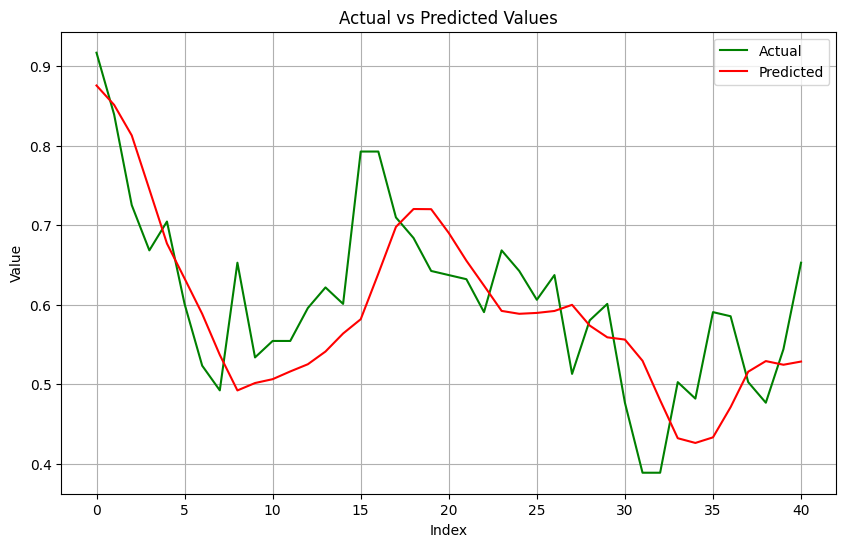

In [ ]:
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure

# Plot the test data
plt.plot(y_test, color='green', label='Actual')

# Plot the predicted data
plt.plot(y_pred, color='red', label='Predicted')

# Add titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')

# Add a legend
plt.legend()

# Show grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()


# Next 30 Days Forecasting

In [ ]:
# Forecasting the next 30 days
def forecast_next_days(model, last_sequence, days=30):
    forecasted = []
    current_sequence = last_sequence

    for _ in range(days):
        predicted_value = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
        forecasted.append(predicted_value)
        current_sequence = np.append(current_sequence[1:], predicted_value).reshape(-1, 1)

    return forecasted



In [ ]:
# Use the last available data point for forecasting
last_sequence = X_test[-1]
predicted_values = forecast_next_days(model, last_sequence, days=30)

# Inverse scale the predicted values
predicted_values_rescaled = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

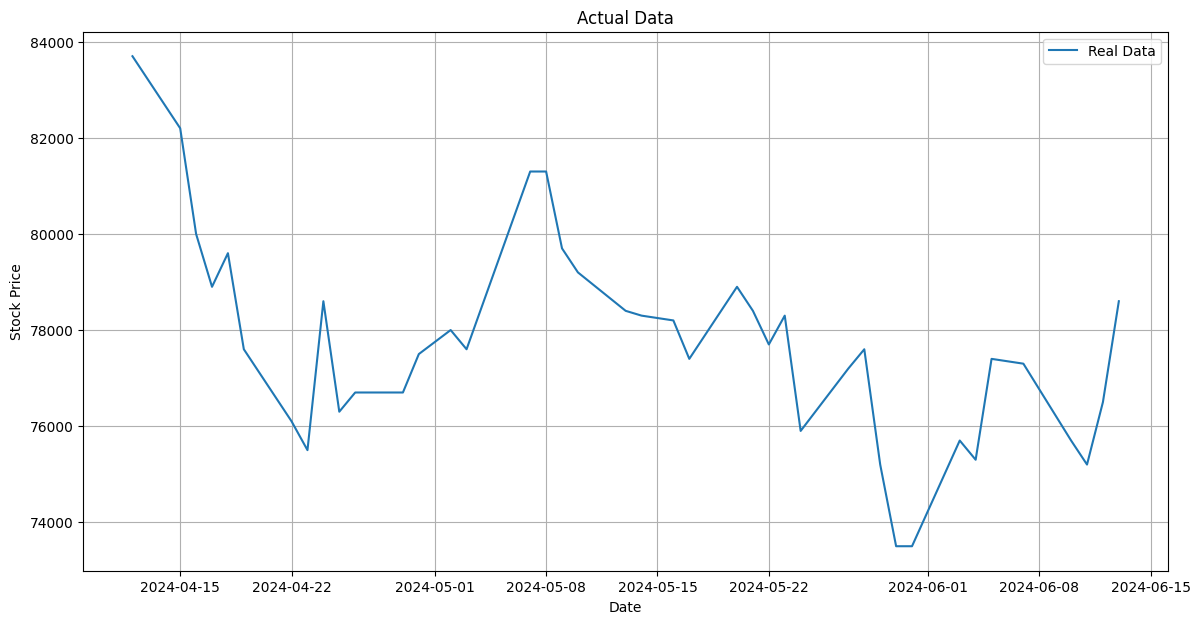

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(test_data[look_back:]), label='Real Data')

plt.title('Actual Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

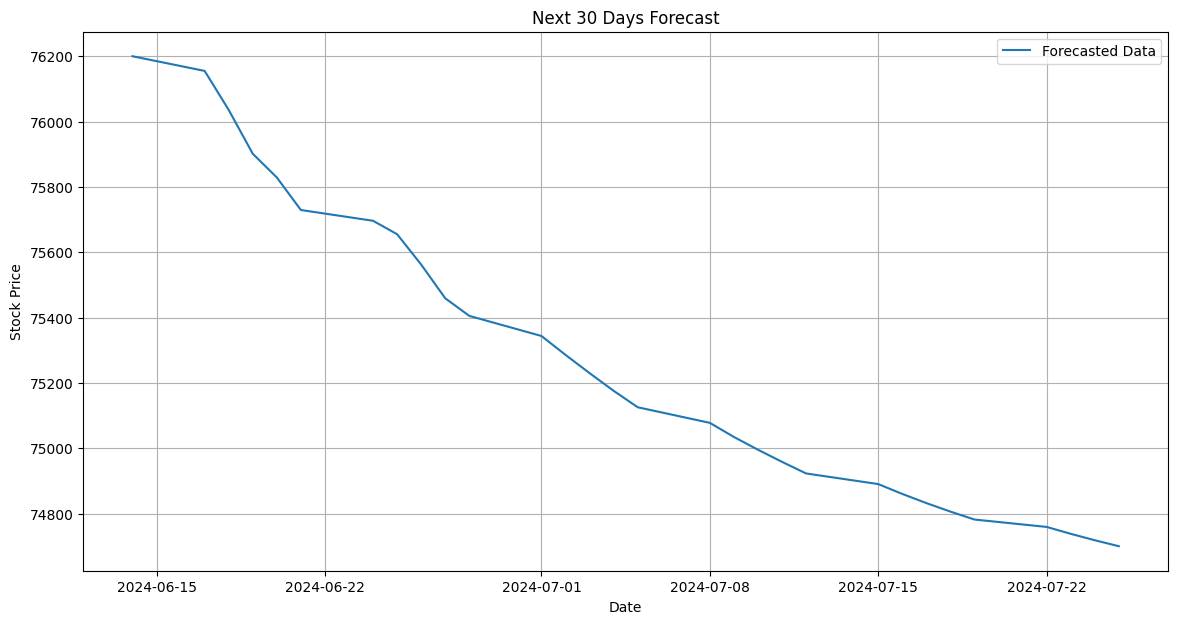

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(pd.date_range(df.index[-1], periods=31, freq='B')[1:], predicted_values_rescaled, label='Forecasted Data')
plt.title('Next 30 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

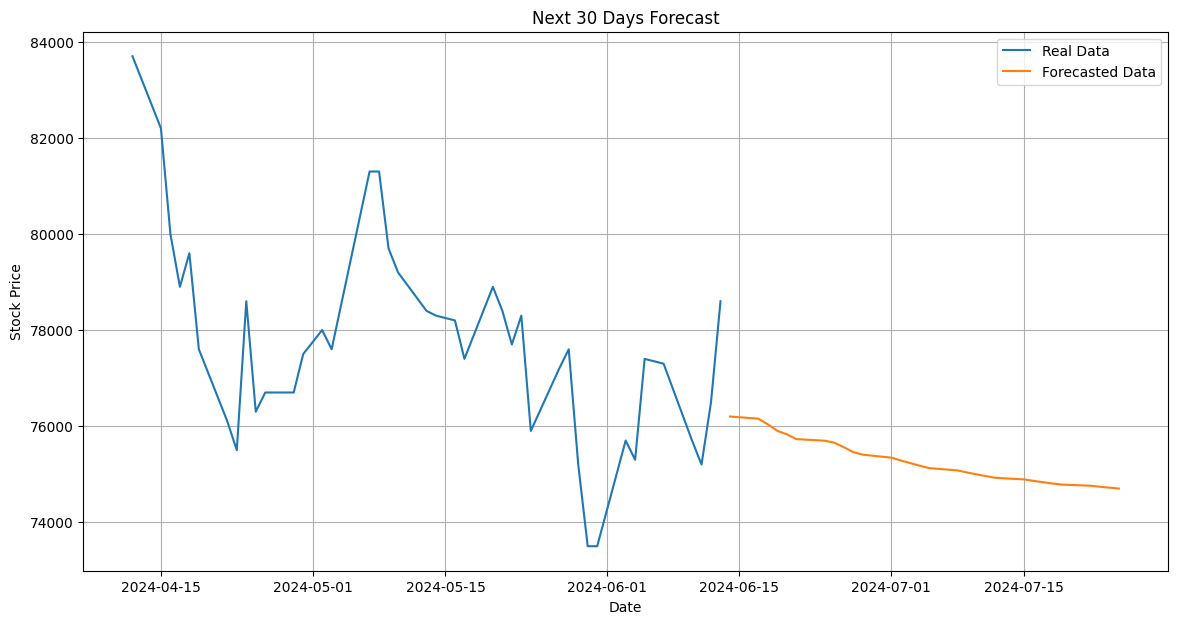

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(test_data[look_back:]), label='Real Data')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='B')[1:], predicted_values_rescaled, label='Forecasted Data')
plt.title('Next 30 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

# Next 90 Days Forecast

In [ ]:
# Use the last available data point for forecasting
last_sequence = X_test[-1]
predicted_values = forecast_next_days(model, last_sequence, days=90)

# Inverse scale the predicted values
predicted_values_rescaled = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

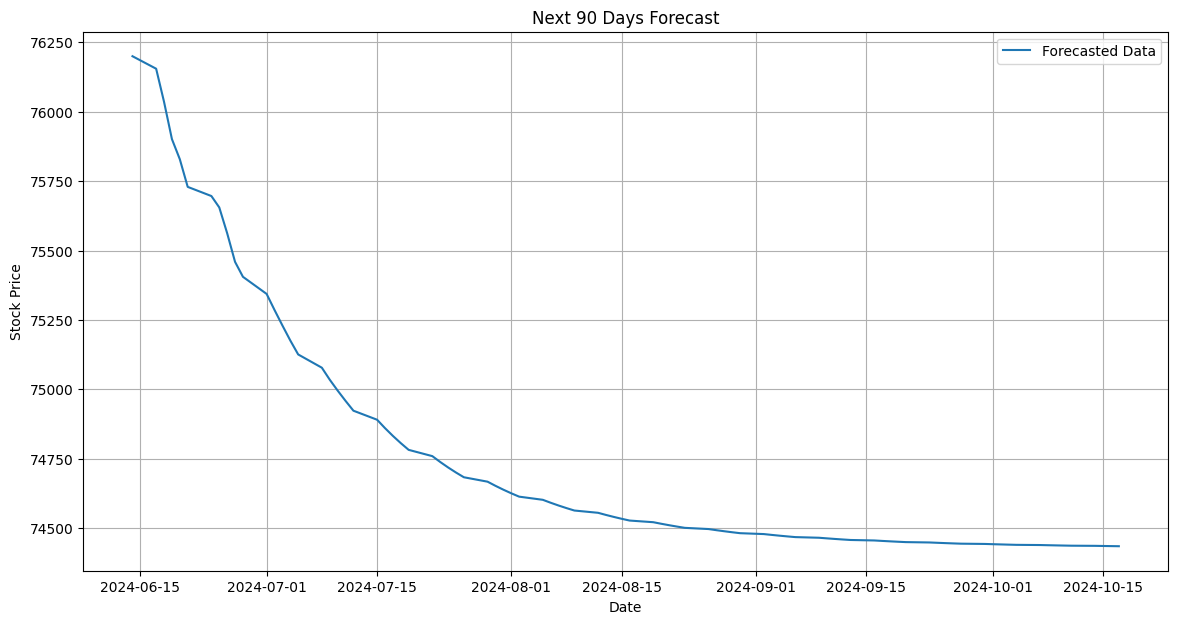

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))

plt.plot(pd.date_range(df.index[-1], periods=91, freq='B')[1:], predicted_values_rescaled, label='Forecasted Data')
plt.title('Next 90 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

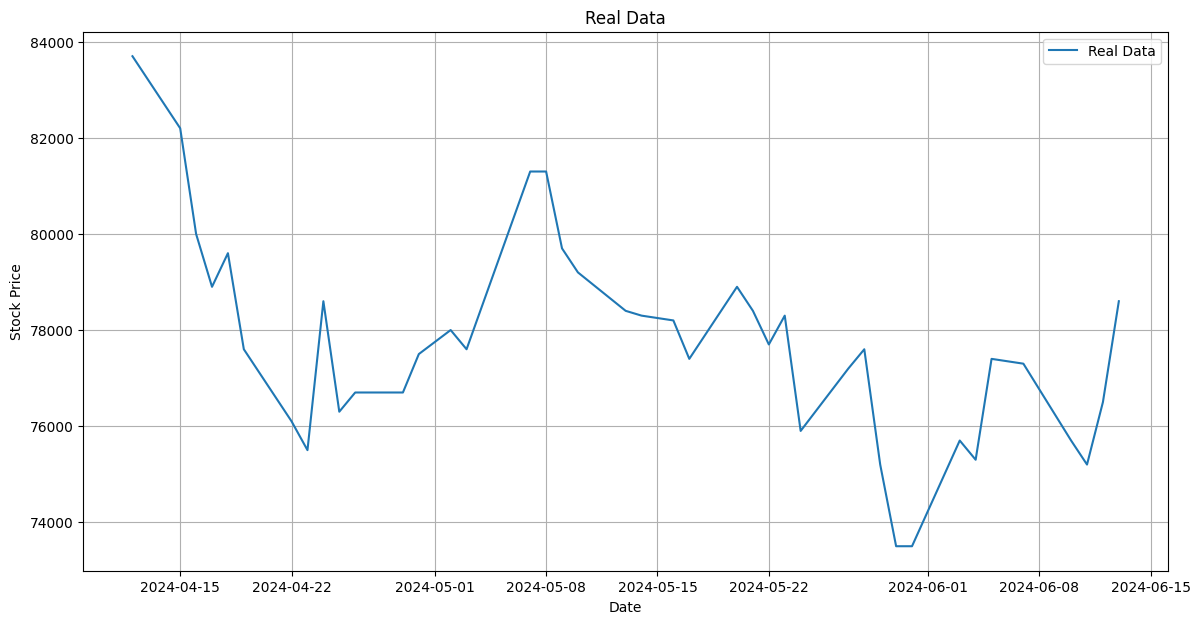

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(test_data[look_back:]), label='Real Data')
plt.title('Real Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()

plt.show()

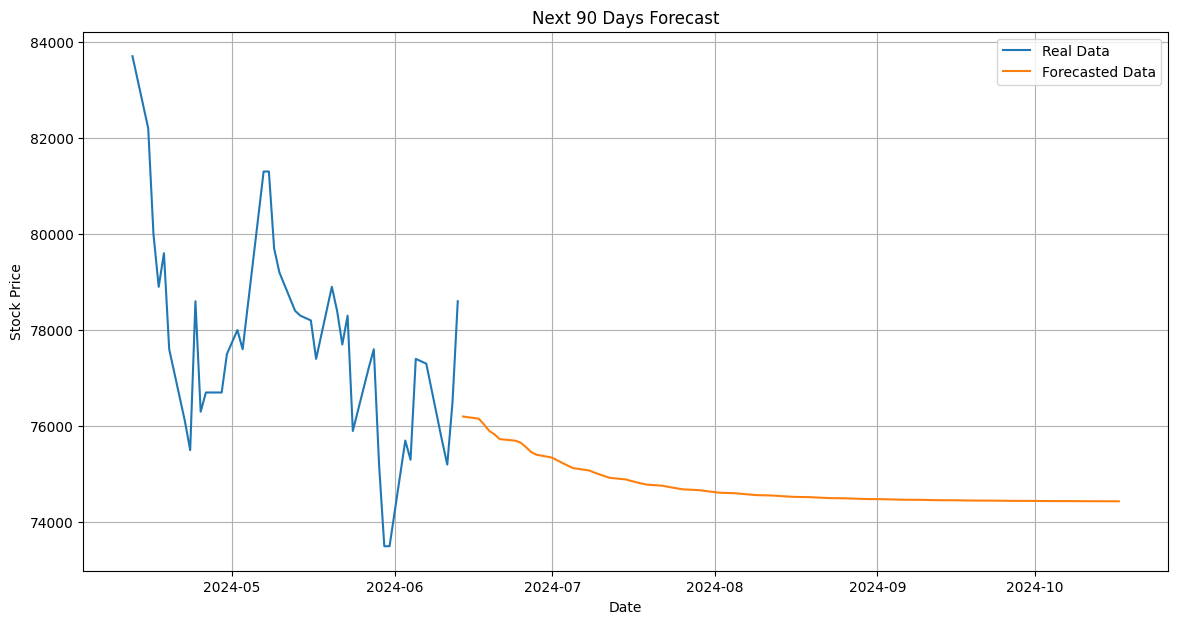

In [ ]:
# Plot the results
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(test_data[look_back:]), label='Real Data')
plt.plot(pd.date_range(df.index[-1], periods=91, freq='B')[1:], predicted_values_rescaled, label='Forecasted Data')
plt.title('Next 90 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()